# Assignment: Ordinary Least Squares Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

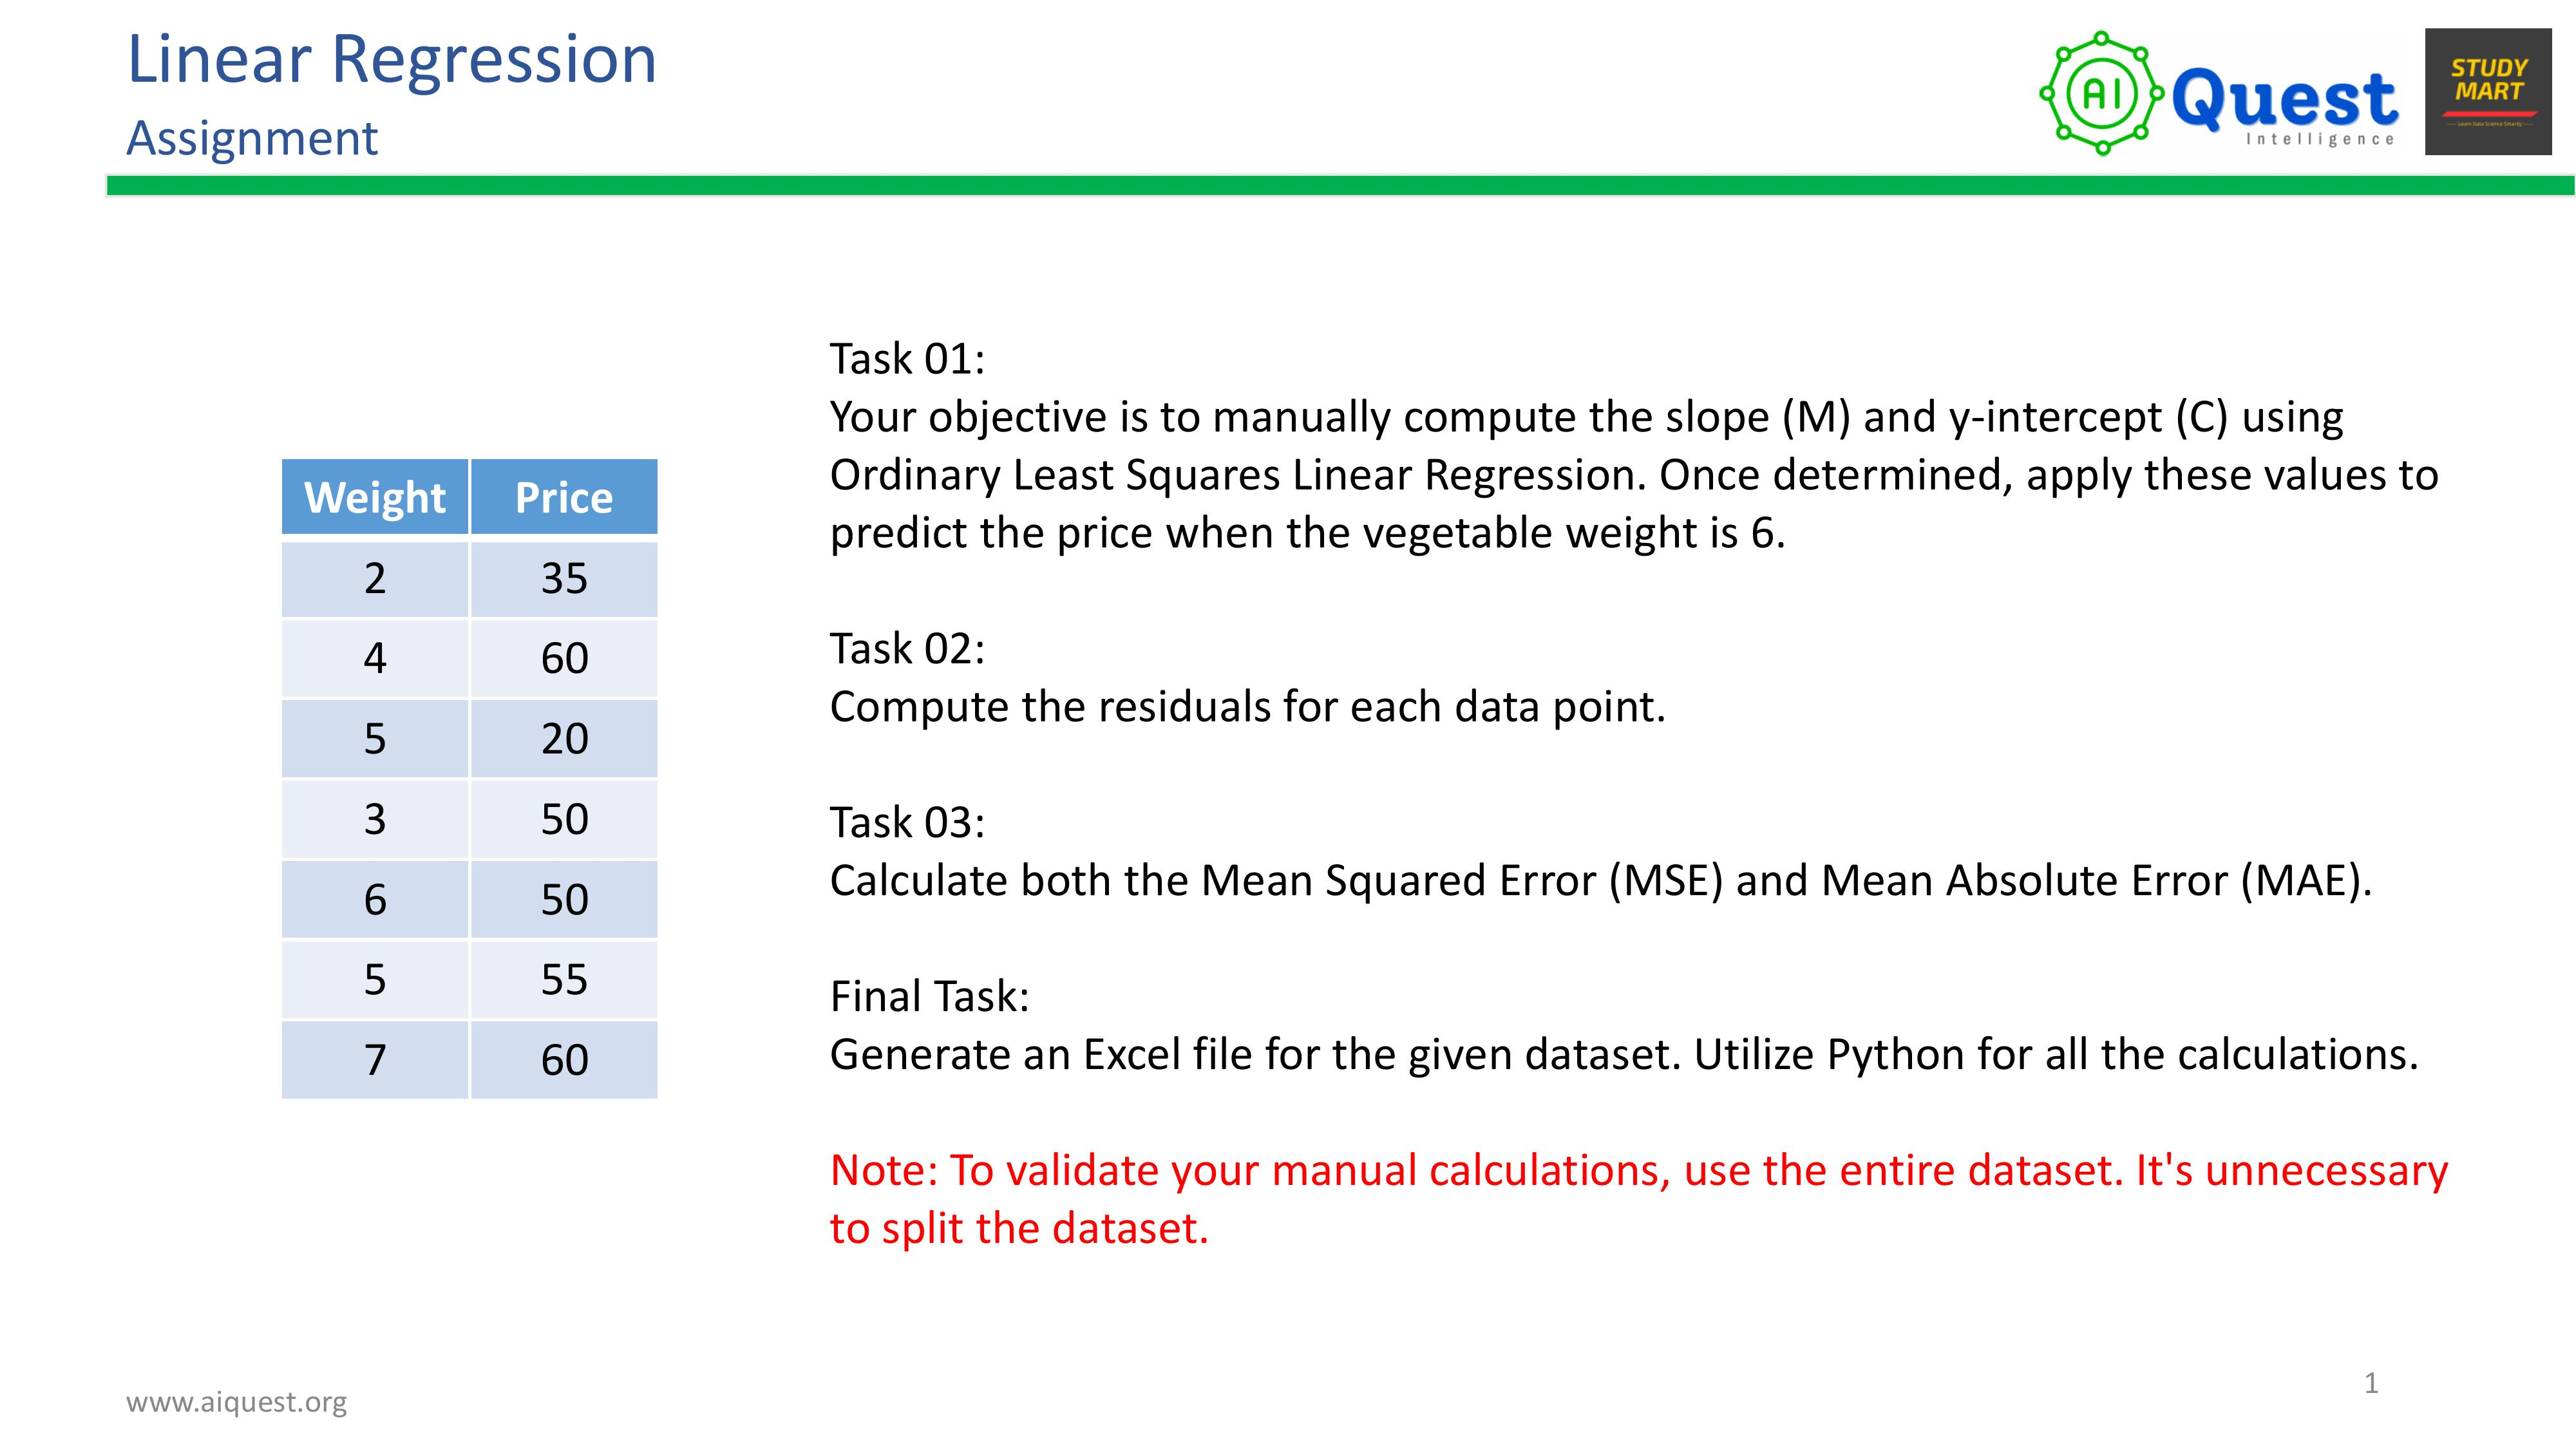

In [2]:
from IPython.display import Image
Image("Assignment on LR.jpg")

# Task 01 
### Your objective is to manually compute the slope (M) and y-intercept (C) using Ordinary Least Squares Linear Regression. Once determined, apply these values to predict the price when the vegetable weight is 6.

In [3]:
value = {
    'weight': [2, 4, 5, 3, 6, 5, 7],
    'price': [35, 60, 20, 50, 50, 55, 60],
}

In [4]:
df = pd.DataFrame(value)
df.head()

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [5]:
x = df['weight']
y = df['price']

In [6]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [7]:
dev_x = x - mean_x
dev_y = y - mean_y

In [8]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x ** 2)
c = mean_y - (m * mean_x)

print('m =', m, '\nc =', c)

m = 2.620967741935484 
c = 35.16129032258065


In [9]:
pred_6 = m*6+c
pred_6

np.float64(50.88709677419355)

### ***sklearn LinearRegression***

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [11]:
reg.fit(df[['weight']], df['price'])

LinearRegression()

In [12]:
print('m = ', reg.coef_)
print('c = ', reg.intercept_)

m =  [2.62096774]
c =  35.16129032258065


In [13]:
reg.predict([[6]])

array([50.88709677])

# Task 02:
### Compute the residuals for each data point.

In [14]:
df['predict'] = reg.predict(df[['weight']])
df.head()

,weight,price,predict
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097


In [15]:
df['Residuals'] = df['price'] - df['predict']
df.head()

,weight,price,predict,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097


# Task 03:
### Calculate both the Mean Squared Error (MSE) and Mean Absolute Error (MAE).

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
MSE = mean_squared_error(df[['price']], df[['predict']])
MSE

167.30990783410135

In [18]:
MAE = mean_absolute_error(df[['price']], df[['predict']])
MAE

9.87327188940092

In [19]:
print('MSE = ', MSE, '\nMAE = ', MAE)

MSE =  167.30990783410135 
MAE =  9.87327188940092


# Final Task:
### Generate an Excel file for the given dataset. Utilize Python for all the calculations.

In [20]:
df.to_excel("vegetable_price_data.xlsx", index=False)

In [21]:
df = pd.read_excel('vegetable_price_data.xlsx')
df

,weight,price,predict,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935
